In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import metrics  
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = '.\Bank_Personal_Loan_Modelling.csv'
df = pd.read_csv(data) 

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 5000 rows and 14 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
print('Number of missing values by column:')
df.isnull().sum()

Number of missing values by column:


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.ID.nunique()

5000

**Như vậy dữ liệu ở cột ID không bị duplicate**

**Đổi tên các cột để tránh xuất hiện những khoảng cách**

In [8]:
df.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"Personal_Loan",
                        "Securities Account":"Securities_Account","CD Account":'CD_Account'},inplace=True)

In [9]:
df['ZIPCode'].nunique()

467

**Nhóm Zip Code lại thành các phân nhóm lớn với cơ sở là 2 số đầu**

In [10]:
df['ZIPCode'] = df['ZIPCode'].astype(str)
df['ZIPCode'] = df['ZIPCode'].str[0:2]
df['ZIPCode'].head()
df['ZIPCode'].nunique()

7

In [11]:
df.drop(['ID'], axis = 1, inplace = True)
#Dropping ID as its not relevant

In [12]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1


In [13]:
df['Education'] = df['Education'].astype('category')
df['Family'] = df['Family'].astype('category')
df['Personal_Loan'] = df['Personal_Loan'].astype('category')
df['Securities_Account'] = df['Securities_Account'].astype('category')
df['CD_Account'] = df['CD_Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')
df['ZIPCode'] = df['ZIPCode'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 235.8 KB


**Thống kê mô tả các biến dạng numerical**

In [14]:
df.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


**Với biến 'Age' trung bình và trung vị gần như bằng nhau khoảng 45 năm và độ tuổi nhỏ nhất là 23 và lớn nhất là 67.\
Với biến 'Experience' với trung bình là khoảng 20 năm, tuy nhiên có giá trị nhỏ nhất -3 - điều này là vô lí, nên đây có thể là một lỗi và cần được kiểm tra.\
Với biến 'Income' với thu nhập nằm trong khoảng 8000-224000 đô la và có trung bình lớn hơn trung vị cho thấy ở đây có độ lệch, nên có thể xuất hiện các giá trị ngoại lệ.\
Với biến 'CCavg' với trung bình là khoảng 1900 đô la và có giá trị nhỏ nhất là 0 đô la - điều này có nghĩa là khách hàng có thể không có bất kỳ thẻ tín dụng nào. Giá trị trung bình và giá trị trung vị của biến này khá gần nhau.\
Với biến 'Mortgage'với trung bình khoảng 56 000 đô la và có giá trị nhỏ nhất là 0 đối với ít nhất 50% khách hàng; điều này có thể có nghĩa là khoảng 50% khách hàng không sở hữu nhà.**

**Thống kê mô tả các biến dạng categorical**

In [15]:
df.describe(include='category')

,ZIPCode,Family,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000,5000,5000,5000,5000,5000,5000,5000
unique,7,4,3,2,2,2,2,2
top,94,1,1,0,0,0,1,0
freq,1472,1472,2096,4520,4478,4698,2984,3530


**Trong các phân khúc Zip Code (tổng cộng có 7 phân khúc) thì phân vùng địa lý có 2 mã đầu 94 xuất hiện nhiều nhất.\
Khách hàng độc thân chiếm phần lớn.
Trình độ học vấn của đa số khách hàng là trình độ đại học.\
Hầu hết các khách hàng của ngân hàng không có tài khoản chứng khoán và sổ tiết kiệm ở đây.\
Số lượng khách hàng sử dụng ngân hàng trực tuyến nhiều hơn so với khách hàng sử dụng dịch vụ trực tiếp tại trụ sở ngân hàng.\
Phần lớn khách hàng không sử dụng tài khoản tín dụng nào khác do ngân hàng phát hành.**

In [16]:
# Kiểm tra độ tuổi của khách hàng có giá trị âm để kiểm tra tính hợp lý
df[df['Experience']<0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

**Chúng ta có thể các khách hàng có số năm kinh nghiệm âm nằm trong độ tuối dưới 30 và trung bình là 24 tuổi. Tuy vậy chúng ta cần xét kỹ hơn cụ thể các giá trị "Experience" bị âm thuộc độ tuổi nào là nhiều nhất**

In [17]:
df1=df[(df.Experience<0)] 
print(f"The unique Negative Experience Array= {df1['Experience'].unique()}")
df1['Age'].value_counts(ascending=True)

The unique Negative Experience Array= [-1 -2 -3]


26     1
28     1
29     3
23    12
24    17
25    18
Name: Age, dtype: int64

**Trong số các khách hàng dưới 30 tuổi thì độ tuổi càng nhỏ thì các giá trị bị âm của Experience xuất hiện càng nhiều.**

In [18]:
df1.shape[0] / df.shape[0]

0.0104

**Vì đây có thể là lỗi nhập dữ liệu hoặc một quy tắc ghi nhận nào đó trong doanh nghiệp mà chúng ta chưa biết nên tạm thời chúng ta không sử dụng các quan sát có giá trị phi logic này (có thể bỏ đi được vì số lượng chỉ có 50 quan sát, khá ít so với toàn bộ dataset.**

In [19]:
df = df[df['Experience'] >= 0]

# Kiểm tra phân phối cụ thể của các biến định lượng

In [20]:
#Performing Univariate Analysis to study the central tendency and dispersion
def dist_box(data):
 #function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 4.5)) #hàm trả về một bộ giá trị chứa (các) đối tượng hình và trục. 
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

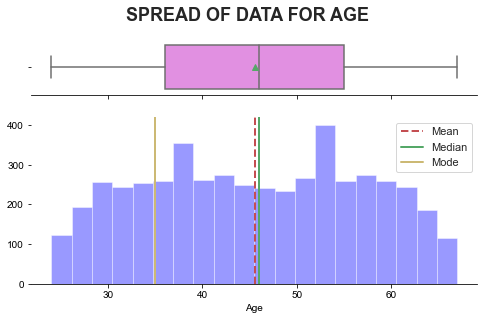

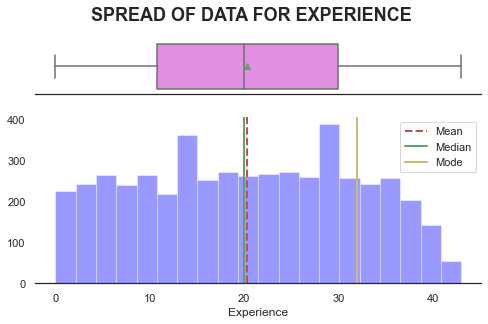

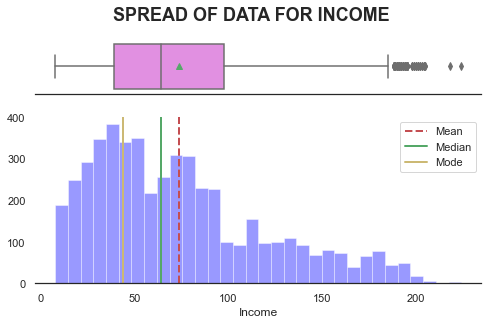

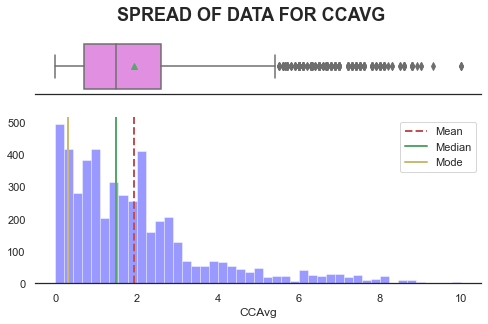

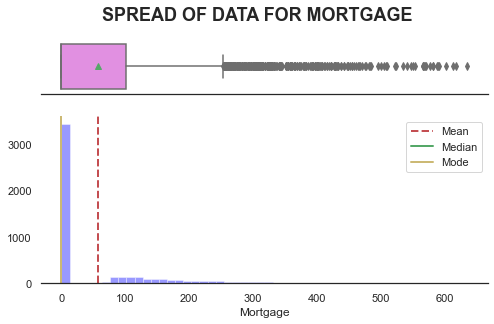

In [21]:
list_col=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

**Với biến 'Age' và 'Experience' có thể thấy được có phân phối bình thường và khá giống nhau - điều này có nghĩa là có tương quan giữa 2 biến này.\
Với biến 'Income' có phân phối bị lệch phải, đa số khách hàng có thu nhập dưới 100.000 đô la tuy nhiên xuất hiện một số ngoại lệ với thu nhập cao hơn.\
Với biến 'CCAvg' có phân phối bị lệch phải nhiều, đa số khách hàng có tiêu dùng trung bình hàng tháng trên thẻ tín dụng dưới 2500 đô la, tuy nhiên xuất hiện một số ngoại lệ có mức chi tiêu cao hơn nhiều so với những khách hàng còn lại.\
Phân phối của biến thu nhập và biến lượng chi tiêu tủng bình cho thẻ tín dụng hàng tháng khá giống nhau, điều này phù hợp với logic.\
Với biến 'Mortgage' cũng có phân phối lệch phải nhiều, hầu hết các khách hàng không có thế chấp - cũng có nghĩa là họ không sở hữu một căn nhà nào cả, tuy nhiên có một số ngoại lệ có giá trị thế chấp rất cao-điều này có thể là do vị trí của các ngôi nhà, vì giá trị đất cao hơn nên là giá thế chấp cao hơn**

# Phân khúc khách hàng dựa vào độ tuổi

In [22]:
df['Agebin'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

# Phân khúc khách hàng dựa vào thu nhập

In [23]:
df["Income_group"] = pd.cut(
    x=df["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)

# Phân khúc khách hàng dựa vào mức độ chi tiêu vào thẻ tín dụng hàng tháng

In [24]:
df["Spending_group"] = pd.cut( x=df["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True ,
)

# Kiểm tra tỷ trọng các giá trị đối với các biến định tính

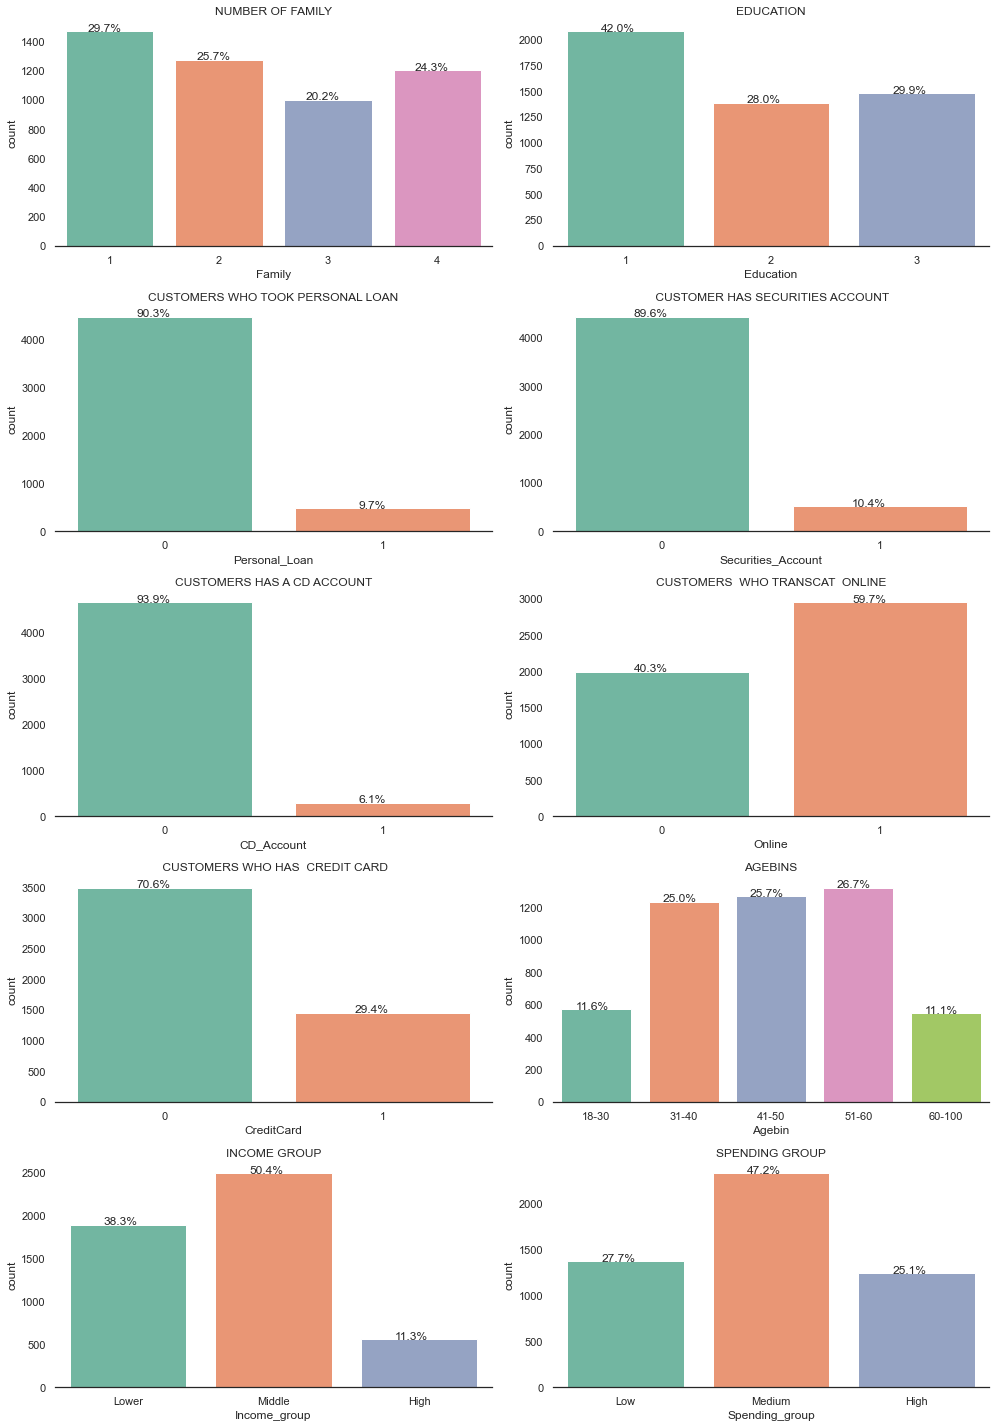

In [25]:
# Making a list of all categorical variables
cat_columns = ['Family','Education','Personal_Loan','Securities_Account',
               'CD_Account','Online','CreditCard','Agebin','Income_group','Spending_group']
title=['Number of Family','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins',"Income group",'Spending group']
plt.figure(figsize=(14,20))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
#list_palette=['Blues_r','Greens_r','Purples_r','Reds_r','Blues_r','Greens_r','Purples_r','Reds_r','Blues_r']

for i, variable in enumerate(cat_columns):#tạo ra vòng lặp
    plt.subplot(5,2,i+1)
    order = df[variable].value_counts(ascending=False).index   
    #sns.set_palette(list_palette[i]) # to set the palette
    sns.set_palette('Set2')
    ax=sns.countplot(x=df[variable], data=df )
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y),ha='center')
    plt.tight_layout()
    plt.title(title[i].upper())

**Với biến 'Family' có 29,4% khách hàng là độc thân.\
Với biến 'Education' có 41,9% khách hàng là sinh viên chưa tốt nghiệp.\
Với biến 'Personal Loan' có 9,6% mua khoản vay cá nhân từ ngân hàng.\
Với biến 'Securities Account' có 10,4% khách hàng có tài khoản chứng khoán tại ngân hàng.\
Với biến 'CD Account' có 6% khách hàng có tài khoản CD.\
Với biến 'Online' có 60% khách hàng sử dụng giao dịch trực tuyến.\
Với biến 'Credit Card' có 29,4% khách hàng có thẻ tín dụng.\
Với biến 'Age' có 75% khách hàng trong độ tuổi 31-60.\
Với biến 'Income' có 50% khách hàng của ngân hàng thuộc nhóm thu nhập trung bình.\
Với biến 'CCAvg' có khoảng 48% khách hàng có mức chi tiêu trung bình**

# Ma trận hệ số tương quan

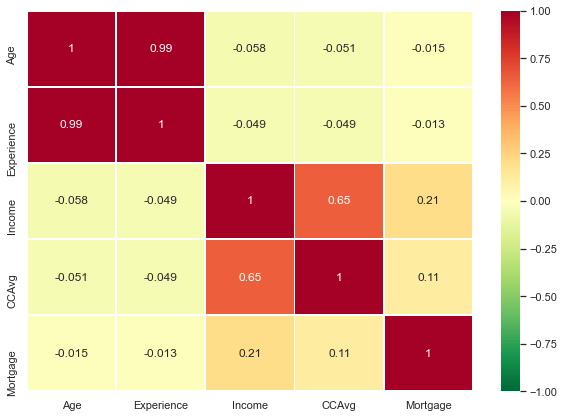

In [26]:
corr= df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot= True,vmin=-1,vmax=1, cmap='RdYlGn_r',linewidths=0.75)
plt.show()

**Biến 'Age' và biến 'Experience' có mối tương quan cao nhất ở mức 0,99.\
Biến 'Income' và biến 'CCAvg' có tương quan dương cao kế tiếp 0.65.\
Biến 'Income' và biến 'CCAvg' có tương quan dương với biến 'Mortgage'. Chứng tỏ rằng khách hàng có thu nhập càng cao hoặc có thói quen tiêu dùng càng nhiều thì có giá trị thế chấp nhà càng cao, phù hợp với logic.**

# So sánh phân phối các biến định lượng theo biến phụ thuộc (khách hàng có chấp nhận vay nợ hay không)

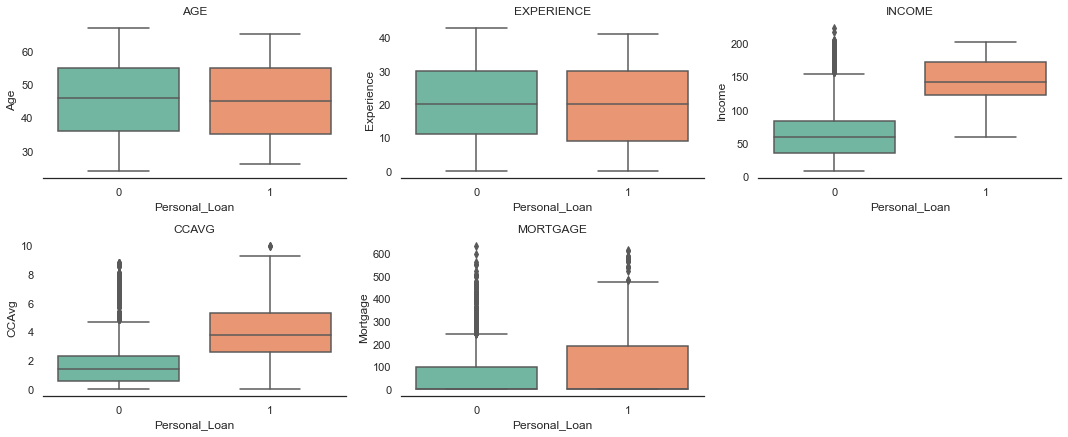

In [27]:
numeric_columns = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,30))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='Personal_Loan',y= df[variable], data=df)     
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())
# For all numerical variables with Personal_Loan

**Với biến 'Age' có giá trị trung bình là như nhau đối với người vay và không vay.\
Với biến 'Experience' cũng tương tự. Cả hai biến này không có bất kỳ ngoại lệ nào.\
Với biến 'Income', những khách hàng có khoản vay có thu nhập cao hơn những khách hàng không vay. Và với nhóm không vay xuất hiện ngoại lệ với mức thu nhập cao hơn.\
Với biến 'CCAvg' nhóm khách hàng không đi vay có chi tiêu thấp hơn và cũng xuất hiện ngoại lệ nhiều hơn nhóm còn lại.\
Với biến 'Mortgage' phần lớn khách hàng ở cả hai nhóm không có thế chấp nhưng với khách hàng có khoản vay có khoản thế chấp cao hơn. Tuy nhiên, nhóm khách hàng không đi vay lại xuất hiện nhiều ngoại lệ hơn.**

# So sánh phân phối các biến định tính theo biến phụ thuộc (khách hàng có chấp nhận vay nợ hay không)

In [28]:
# Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2", 8))
    tab1 = pd.crosstab(x,df['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

Personal_Loan     0    1   All
Family                        
1              1363  107  1470
2              1168  106  1274
3               868  133  1001
4              1069  134  1203
All            4468  480  4948
------------------------------------------------------------------------------------------------------------------------


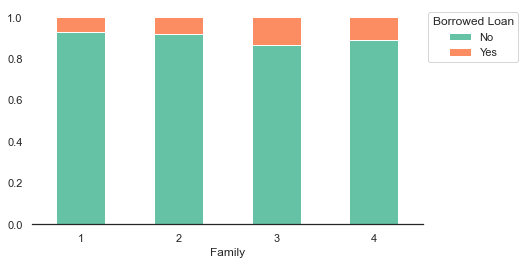

Personal_Loan     0    1   All
Education                     
1              1987   93  2080
2              1205  182  1387
3              1276  205  1481
All            4468  480  4948
------------------------------------------------------------------------------------------------------------------------


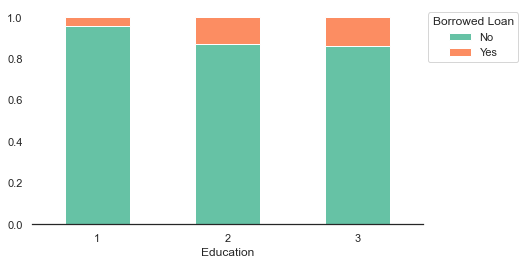

Personal_Loan          0    1   All
Securities_Account                 
0                   4012  420  4432
1                    456   60   516
All                 4468  480  4948
------------------------------------------------------------------------------------------------------------------------


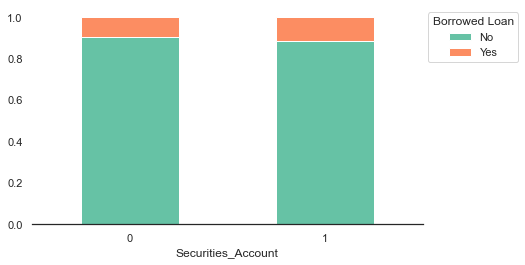

Personal_Loan     0    1   All
CD_Account                    
0              4306  340  4646
1               162  140   302
All            4468  480  4948
------------------------------------------------------------------------------------------------------------------------


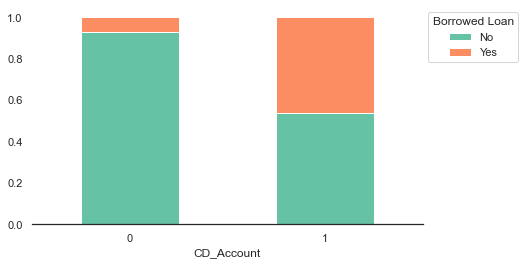

Personal_Loan     0    1   All
CreditCard                    
0              3156  337  3493
1              1312  143  1455
All            4468  480  4948
------------------------------------------------------------------------------------------------------------------------


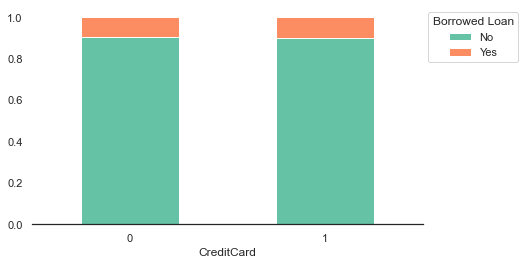

Personal_Loan     0    1   All
Online                        
0              1805  189  1994
1              2663  291  2954
All            4468  480  4948
------------------------------------------------------------------------------------------------------------------------


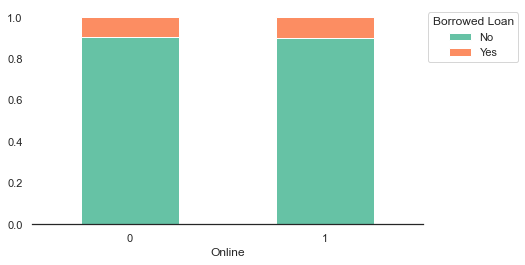

Personal_Loan     0    1   All
Agebin                        
18-30           506   66   572
31-40          1118  118  1236
41-50          1148  122  1270
51-60          1208  115  1323
60-100          488   59   547
All            4468  480  4948
------------------------------------------------------------------------------------------------------------------------


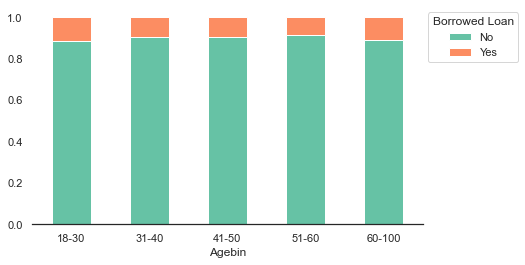

Personal_Loan     0    1   All
Income_group                  
Lower          1893    0  1893
Middle         2273  223  2496
High            302  257   559
All            4468  480  4948
------------------------------------------------------------------------------------------------------------------------


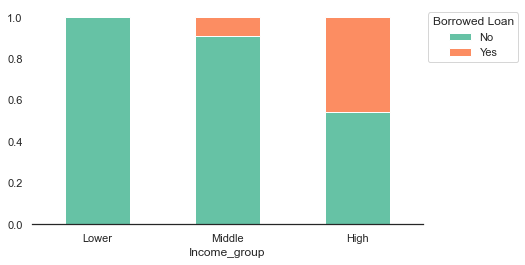

Personal_Loan      0    1   All
Spending_group                 
Low             1334   39  1373
Medium          2255   79  2334
High             879  362  1241
All             4468  480  4948
------------------------------------------------------------------------------------------------------------------------


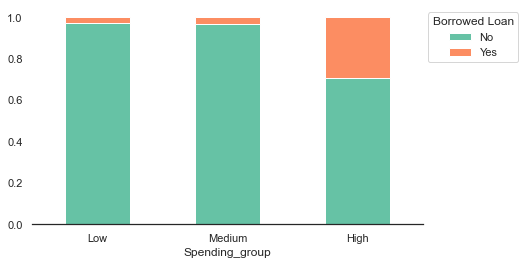

In [29]:
cat_columns=['Family','Education','Securities_Account','CD_Account','CreditCard','Online','Agebin','Income_group','Spending_group']
for i, variable in enumerate(cat_columns):
       stacked_plot(df[variable])

**'Family' khách hàng có số người phụ thuộc 3-4 có khoản vay cá nhân nhiều hơn nhóm còn lại. Điều này có thể dễ hiểu được khi số lượng thành viên trong gia đình càng nhiều thì nhu cầu chi tiêu sẽ càng nhiều.\
'Education' khách hàng có học vấn càng cao thì càng có khoản vay cá nhân nhiều hơn (có thể thấy khách hàng có học vị tiến si có nhiều khoản vay nhất.\
'CD Account' Khả năng khách hàng vay nợ rất cao ở nhóm khách hàng có tài khoản tiền gửi.\
'Age' khách hàng có phân khúc tuổi lớn (trên 60) có khoản vay cá nhân nhiều hơn những phân khúc tuổi khác.\
'Income' khách hàng có mức thu nhập cao (trên 140.000 đô la) có khoản vay cá nhân nhiều hơn.\
'CCAvg' khách hàng có mức chi tiêu TB trong tháng cao (trên 2500 đô la) có khoản vay cá nhân nhiều hơn.\
Không có sự khác biệt đáng kể về tỷ lệ khách hàng chấp nhận vay nợ khi xét đến các yếu tố như khách hàng có tài khoản chứng khoán hay không, khách hàng có sử dụng thẻ tín dụng do ngân hàng khác cung cấp hay không hay khách hàng có sử dụng dịch vụ ngân hàng Online hay không.**

# Tiến hành các bước cuối cùng trước khi chạy mô hình như mã hóa dữ liệu, phân dữ liệu ra các biến dự báo và biến mục tiêu

**Chuyển các biến chỉ có giá trị 0 và 1 thành các biến số trước khi sử dụng hiệu quả hàm get_dummies**

In [30]:
list_features = ['Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', ]
for i in list_features:
    df[i] = pd.to_numeric(df[i])

In [31]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Agebin,Income_group,Spending_group
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0,18-30,Lower,Medium
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0,41-50,Lower,Medium
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0,31-40,Lower,Medium
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0,31-40,Middle,High
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1,31-40,Lower,Medium


In [32]:
df.dtypes

Age                      int64
Experience               int64
Income                   int64
ZIPCode               category
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan            int64
Securities_Account       int64
CD_Account               int64
Online                   int64
CreditCard               int64
Agebin                category
Income_group          category
Spending_group        category
dtype: object

**Loại bỏ các biến đã được phân khúc vì sự dư thừa**

In [33]:
df.drop(['Agebin', 'Income_group', 'Spending_group'], axis=1, inplace=True)

In [34]:
## Defining X and Y variables
X = df.drop(['Personal_Loan'], axis=1) #dropping the dependent variable
Y = df[['Personal_Loan']]

In [35]:
#Convert categorical variables to dummy variables
X = pd.get_dummies(X)

In [36]:
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_90,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,1.6,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
1,45,19,34,1.5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0


# Tách dữ liệu ra tập train và tập test trước khi chạy mô hình

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.30,random_state=29)

# Triển khai mô hình Decision Tree 

In [38]:
Dt = DecisionTreeClassifier(criterion='gini', splitter = 'best', min_samples_leaf = 5,
                            class_weight={0:0.15,1:0.85}, random_state=29)
Dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, min_samples_leaf=5,
                       random_state=29)

In [39]:
y_predict_Dt = Dt.predict(X_test)

In [40]:
cf_matrix = confusion_matrix(y_test, y_predict_Dt)
print(cf_matrix)

[[1321   20]
 [  13  131]]


# Trực quan hóa Confusion matrix

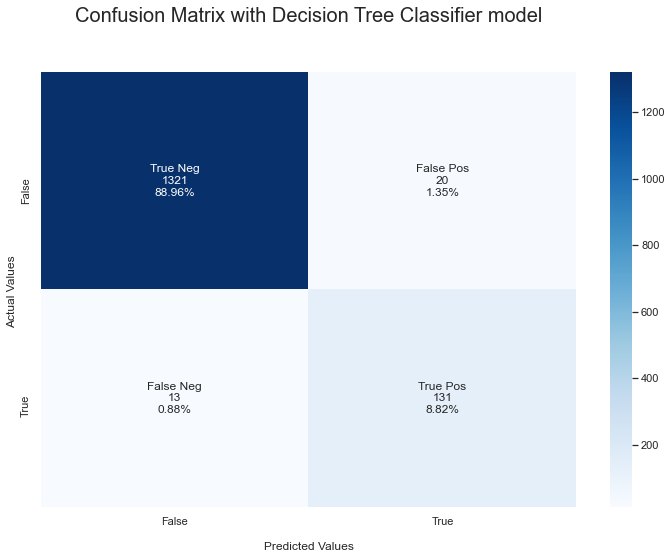

In [41]:
plt.figure(figsize=(12,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with Decision Tree Classifier model\n\n',fontsize=20);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [42]:
def scores(model):
    """ model : classifier to predict X values """
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("Accuracy on training set : ",metrics.accuracy_score(y_train,y_pred_train))
    print("Accuracy on test set : ",metrics.accuracy_score(y_test,y_pred_test))

    print("\nRecall on training set : ",metrics.recall_score(y_train,y_pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,y_pred_test))
    
    print("\nPrecision on training set : ",metrics.precision_score(y_train,y_pred_train))
    print("Precision on test set : ",metrics.precision_score(y_test,y_pred_test))
    
    print("\nF1 on training set : ",metrics.f1_score(y_train,y_pred_train))
    print("F1 on test set : ",metrics.f1_score(y_test,y_pred_test))

In [43]:
scores(Dt)

Accuracy on training set :  0.9861391856771585
Accuracy on test set :  0.9777777777777777

Recall on training set :  1.0
Recall on test set :  0.9097222222222222

Precision on training set :  0.875
Precision on test set :  0.8675496688741722

F1 on training set :  0.9333333333333333
F1 on test set :  0.888135593220339


In [44]:
metrics.roc_auc_score(y_test, y_predict_Dt)

0.9474039895600298

**Trực quan kết quả từ mô hình Decision Tree.**

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_90', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Family_1', 'Family_2', 'Family_3', 'Family_4', 'Education_1', 'Education_2', 'Education_3']


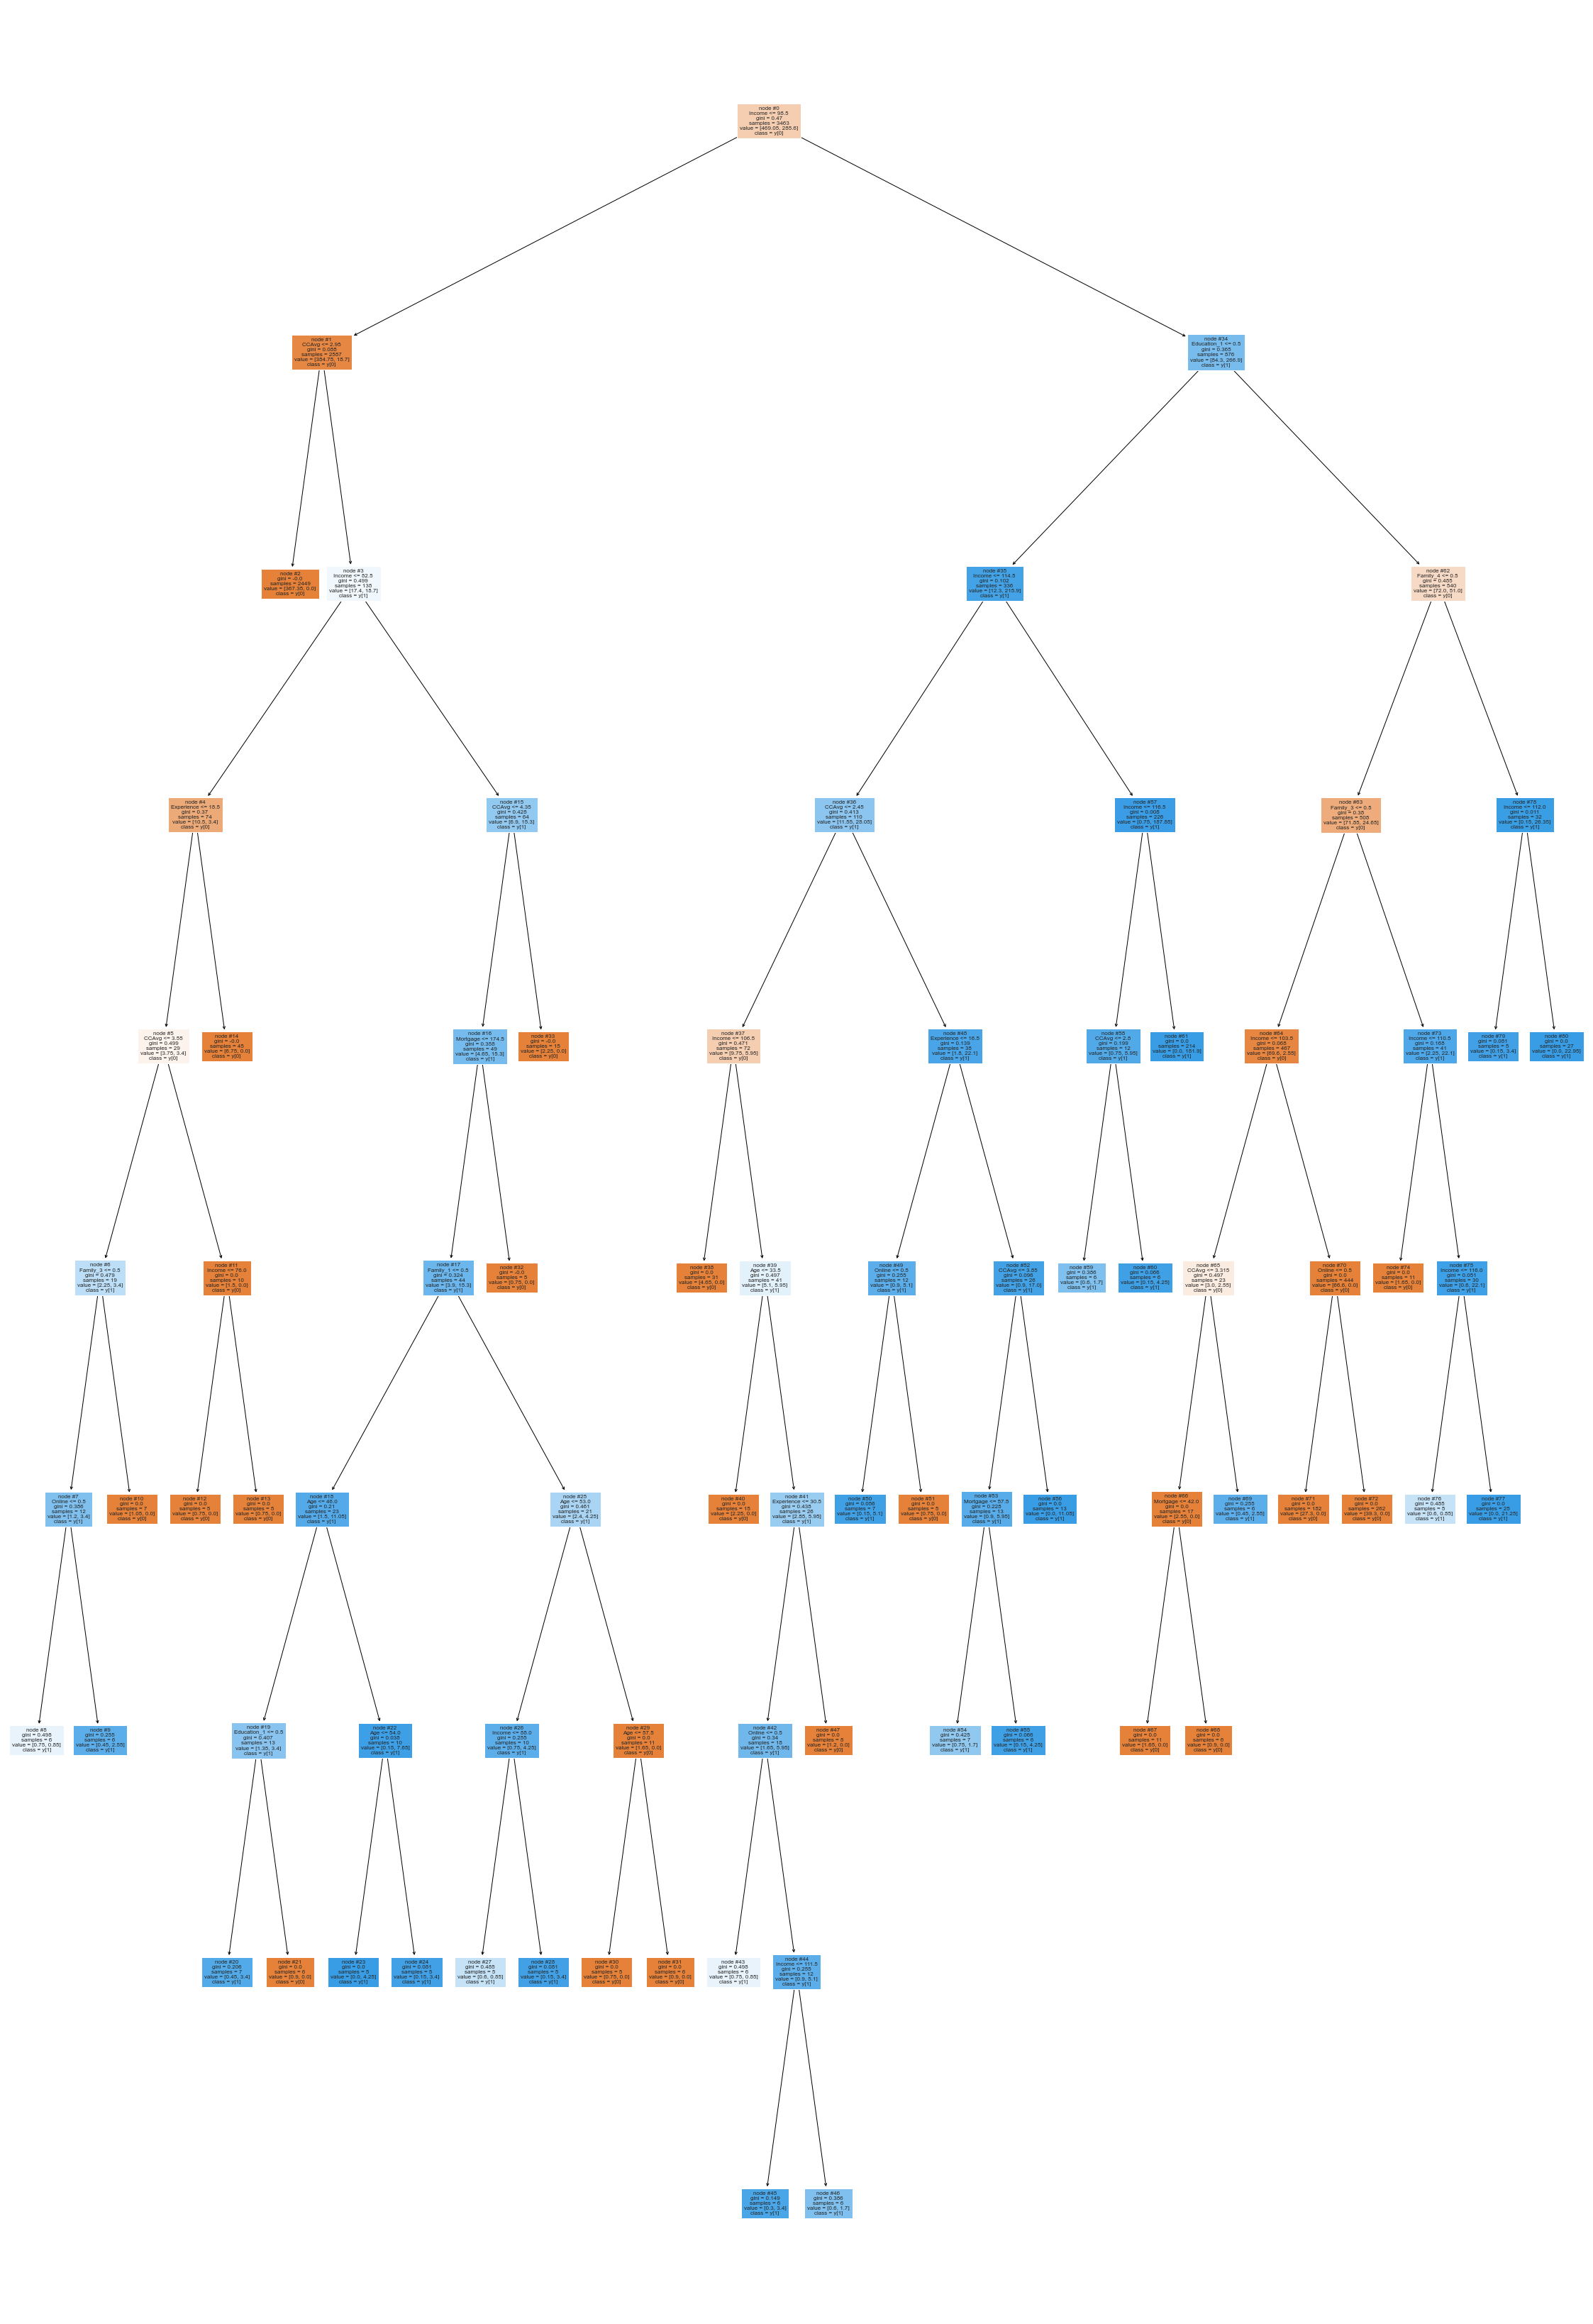

In [45]:
column_names = list(X.columns)
print(column_names)
plt.figure(figsize=(40,60))
out = tree.plot_tree(Dt,feature_names=column_names,filled=True,fontsize=8,node_ids=True,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

**Kết quả mô hình Decision Tree dạng Text.**

In [46]:
# Text report showing the rules of a decision tree -
print(tree.export_text(Dt,feature_names=column_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [367.35, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 82.50
|   |   |   |--- Experience <= 18.50
|   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.75, 0.85] class: 1
|   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |--- weights: [0.45, 2.55] class: 1
|   |   |   |   |   |--- Family_3 >  0.50
|   |   |   |   |   |   |--- weights: [1.05, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.55
|   |   |   |   |   |--- Income <= 76.00
|   |   |   |   |   |   |--- weights: [0.75, 0.00] class: 0
|   |   |   |   |   |--- Income >  76.00
|   |   |   |   |   |   |--- weights: [0.75, 0.00] class: 0
|   |   |   |--- Experience >  18.50
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- Income >  82.50
|   |   |   |--- CCAvg <= 4.35
|   |   |   |   |--- Mortgage <= 174.50


**Các biến quan trọng mà mô hình Decision Tree chỉ ra**

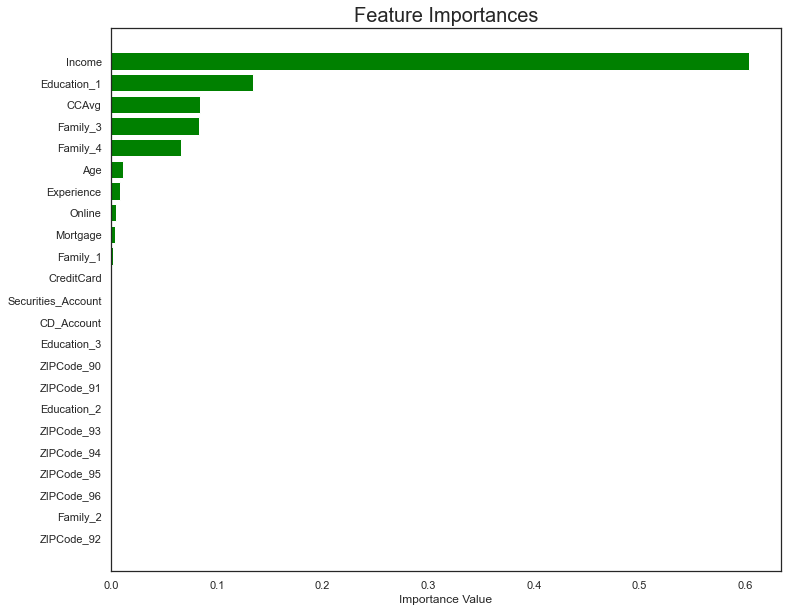

In [47]:
importance = Dt.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(12,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importance[indices], color='green', align='center')
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel('Importance Value')
plt.savefig('DTFI.png')
plt.show()

**Các biến số quan trọng để xác định được khách hàng có vay nợ hay không nằm ở biến:\
Thu nhập.\
Khách hàng có học vị cử nhân đại học.\
Mức độ chi tiêu hàng tháng.\
Số lượng thành viên trong gia đình của khách hàng (nhất là khách hàng có số lượng người trong gia đình là 3 hay 4 hay không là quan trọng nhất).**

# Ngân hàng muốn một mô hình có dự báo chính xác những khách hàng có vay nợ, vì vậy mô hình tốt phải có chỉ số Recall cao.

**Sử dụng công cụ GridSearchCV để cải tiến mô hình để cho ra chỉ số Recall cao nhất.**

In [48]:
from sklearn.model_selection import GridSearchCV
# Choose the type of classifier. 
classifier = DecisionTreeClassifier(random_state=29,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(1,11), 
            'criterion': ['gini','entropy'],
            'splitter': ['best','random'],
            'max_features': ['log2','sqrt'],
            'min_samples_leaf': np.arange(1,11)}

# Type of scoring used to compare parameter combinations
recall_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(classifier, parameters, scoring=recall_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=3,
                       max_features='log2', min_samples_leaf=2,
                       random_state=29)

In [49]:
y_predict_Dt_2 = classifier.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_predict_Dt_2)
print(cf_matrix)

[[1068  273]
 [   4  140]]


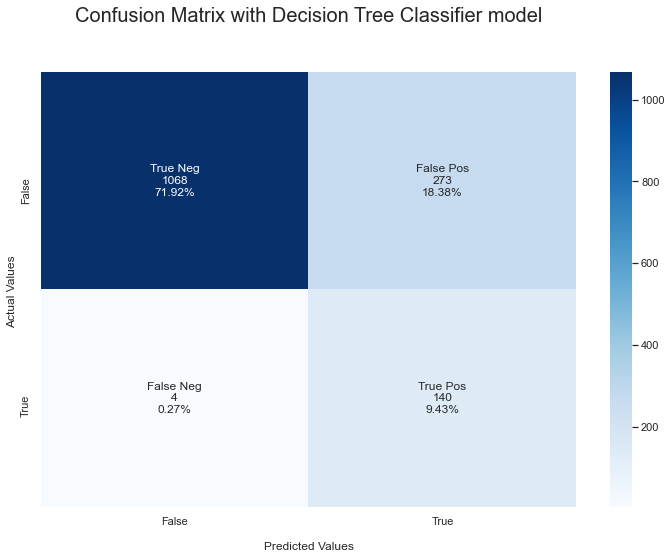

In [50]:
plt.figure(figsize=(12,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with Decision Tree Classifier model\n\n',fontsize=20);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [51]:
scores(classifier)

Accuracy on training set :  0.8099913369910482
Accuracy on test set :  0.8134680134680135

Recall on training set :  0.9880952380952381
Recall on test set :  0.9722222222222222

Precision on training set :  0.3367139959432049
Precision on test set :  0.3389830508474576

F1 on training set :  0.5022692889561271
F1 on test set :  0.5026929982046678


In [52]:
metrics.roc_auc_score(y_test, y_predict_Dt_2)

0.8843214019388517

**Chúng ta có thể thấy để phục vụ mục đích tóm được các khách hàng sẽ vay nợ (chỉ số Recall cao nhất có thể) thì việc tất yếu là hy sinh các chỉ số khác như Accuracy, Precision, F1-score hay ROC_AUC_score**

# Mô hình Decision Tree được đánh giá là rất dễ gặp phải hiện tượng Overfitting, vì vậy một cách để tránh là sử dụng mô hình Random Forest

In [53]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

# Hyperparameter để tìm ra mô hình Random Forest cho giá trị Recall cao nhất

In [54]:
def grid_search_wrapper(refit_score='recall_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [55]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 15, 'max_features': 10, 'min_samples_split': 3, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg      1341         0
pos        19       125


In [62]:
rf = RandomForestClassifier(max_depth= 15, max_features= 20, min_samples_split = 5, n_estimators = 100, random_state=29)
rf.fit(X_train,y_train)
y_predict_Rf = rf.predict(X_test)

In [63]:
cf_matrix = confusion_matrix(y_test, y_predict_Rf)
print(cf_matrix)

[[1341    0]
 [  14  130]]


In [78]:
metrics.accuracy_score(y_test, y_predict_Rf)

0.9905723905723905

In [64]:
metrics.roc_auc_score(y_test, y_predict_Rf)

0.9513888888888888

In [66]:
# view the feature scores
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Income                0.355937
Education_1           0.323240
Family_4              0.084722
CCAvg                 0.073974
Family_3              0.063653
Education_2           0.018368
Age                   0.014748
Experience            0.012555
Education_3           0.012547
CD_Account            0.010148
Mortgage              0.006776
Family_2              0.004376
ZIPCode_93            0.003297
Online                0.003232
Family_1              0.002659
CreditCard            0.001897
Securities_Account    0.001613
ZIPCode_92            0.001499
ZIPCode_91            0.001465
ZIPCode_94            0.001151
ZIPCode_95            0.001108
ZIPCode_90            0.001033
ZIPCode_96            0.000000
dtype: float64

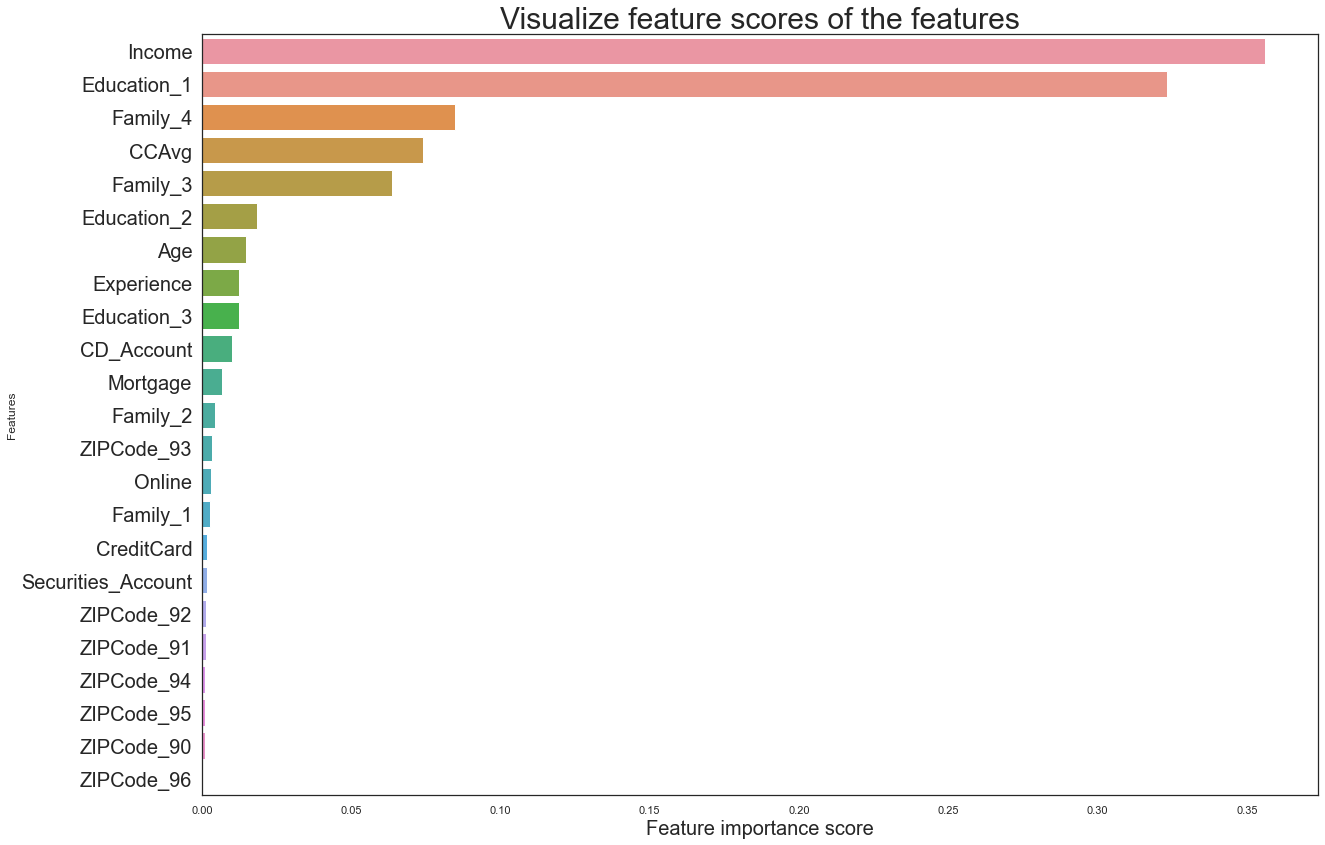

In [70]:
f, ax = plt.subplots(figsize=(20, 14))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features",fontsize = 30)
ax.set_yticklabels(feature_scores.index, fontsize=20)
ax.set_xlabel("Feature importance score", fontsize=20)
ax.set_ylabel("Features")
plt.show()

# Các biến số quan trọng rút ra từ hai mô hình liệu có giống nhau?

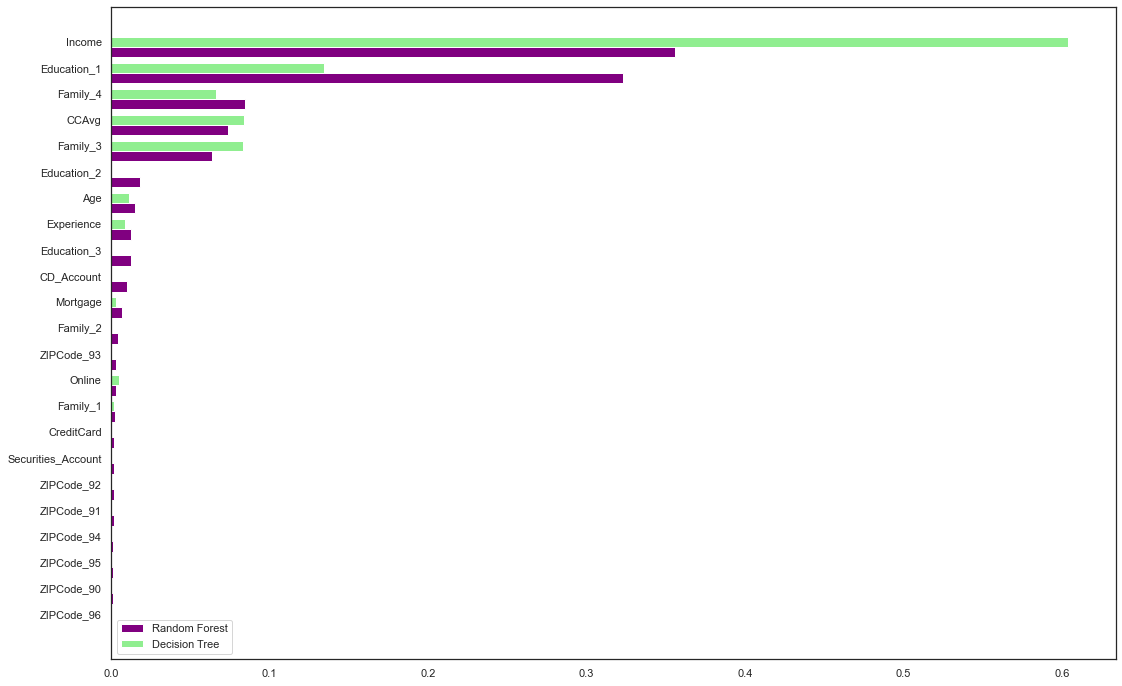

In [77]:
feature_importance=pd.DataFrame({
    'rfc':rf.feature_importances_,
    'dt':Dt.feature_importances_},index=X.columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,12))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

**Các biến quan trọng tương đối giống nhau ở cả hai mô hình Decision Tree và Random Forest, chẳng hạn như 5 biến quan trọng nhất ở cả hai mô hình là như nhau, có chẳng chỉ khác biệt ở thứ tự.**

In [83]:
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_predict_Dt)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_predict_Rf)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_predict_Dt_2)

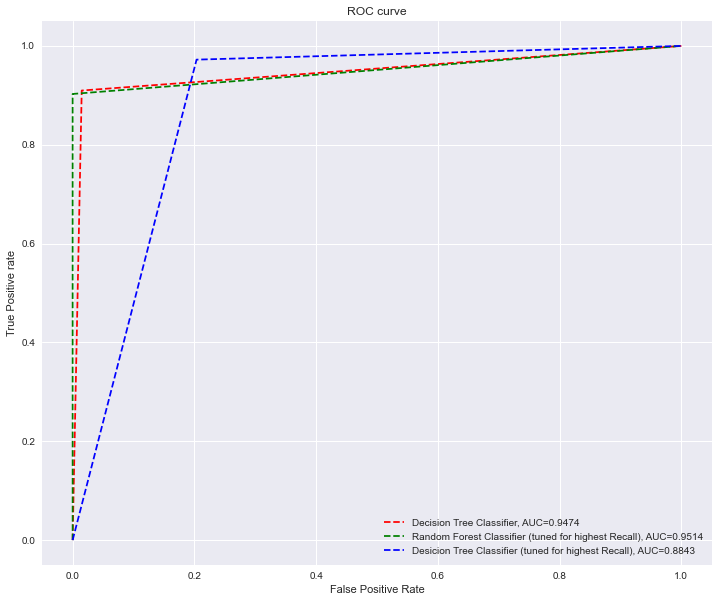

In [88]:
plt.style.use('seaborn')
plt.figure(0, figsize = (12,10)).clf()
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Decision Tree Classifier, AUC='+str(round(metrics.roc_auc_score(y_test, y_predict_Dt), 4)))
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier (tuned for highest Recall), AUC='+str(round(metrics.roc_auc_score(y_test, y_predict_Rf), 4)))
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Desicion Tree Classifier (tuned for highest Recall), AUC='+str(round(metrics.roc_auc_score(y_test, y_predict_Dt_2), 4)))
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

**Nếu mục tiêu của ngân hàng chỉ để tóm được các khách hàng chấp nhận vay nợ thì mô hình Decision Tree Classifier (tuned for highest Recall) sẽ phù hợp nhất trong các mô hình ở trên. Trong trường hợp này, mô hình dự đoán khách hàng có vay nợ trong khi thực tế khách hàng không vay nợ sẽ rất nhiều và đây là điểm yếu của mô hình khiến cho chỉ số AUC rất thấp (có thể thấy trong biểu đồ trên).\
Nếu mất mát từ False Positive và False Negative là như nhau, việc chọn mô hình có chỉ số ROC_AUC cao nhất là phù hợp. Trong trường hợp này, Random Forest Classifier (tuned for highest Recall) sẽ là ứng viên phù hợp nhất.** 